In [54]:
# Requirements

#!pip3 install numpy
#!pip3 install pandas
#!pip3 install geopandas
#!pip3 install matplotlib
#!pip3 install scipy
#!pip3 install networkx
#!pip3 install descartes

In [55]:
# Libraries used

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix

In [56]:
# Constants and Configurations

FILEPATH_DATA = 'data/mediciones.csv'
FILEPATH_DDBB = 'data/estaciones.csv'

# Plot in Dark Mode like a Hacker
plt.style.use('dark_background')

In [57]:
# Utils Functions

def delete_nan(row):
    try:
        row[["Latitud", "Longitud"]] = pd.to_numeric(row[["Latitud", "Longitud"]])
        return row
    except:
        return np.nan

In [58]:
# Script

coords = pd.read_csv(FILEPATH_DDBB).apply(delete_nan, axis=1).dropna()
D = distance_matrix(coords[["Latitud", "Longitud"]], coords[["Latitud", "Longitud"]])

D[D == 0] = 0.0001 # Deal with 1/0
D = 1/(D**2)

graph = nx.convert_matrix.from_numpy_matrix(D)

<IPython.core.display.Javascript object>


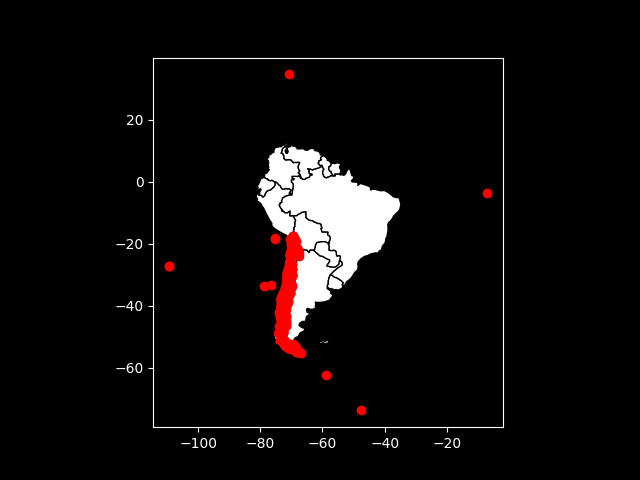

<AxesSubplot:>

In [59]:
# To see if data has sense
gdf = gpd.GeoDataFrame(coords, geometry=gpd.points_from_xy(coords.Longitud, coords.Latitud))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[(world.continent == 'South America')|(world.continent == 'Antartctica')].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')